In [2]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import Lasso


import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [9]:
import matplotlib 
matplotlib.__version__

'3.1.2'

In [122]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [47]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [48]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


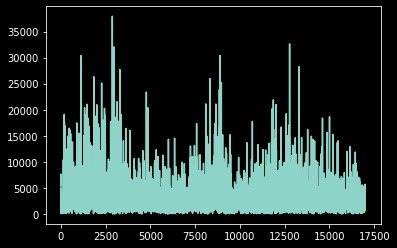

In [49]:
training_df["total_rooms"].plot()

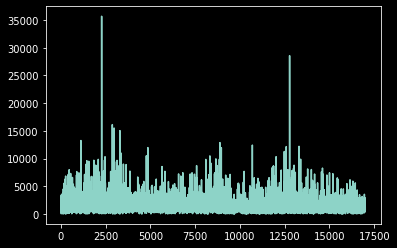

In [50]:
training_df["population"].plot()

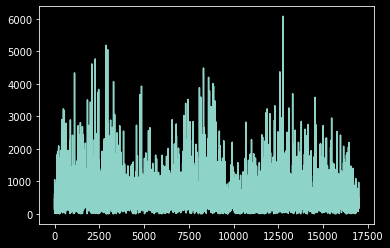

In [51]:
training_df["households"].plot()

In [52]:
# Scaling the label.
training_df["median_house_value"] /= 1000.0


In [53]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [54]:
# Checking for missing values 
training_df.isnull().sum()
# There are no missing values in this dataset :)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [55]:
#checking for duplicates  - 
#reference - https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicateRowsDF = training_df[training_df.duplicated()]

duplicateRowsDF
#training_df.duplicated()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


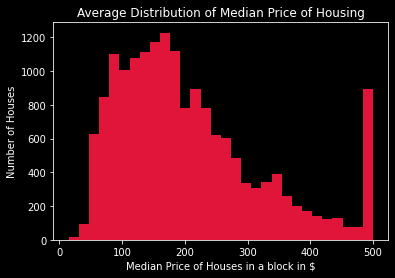

In [56]:
# Plotting the median house values 
plt.hist(training_df.median_house_value,bins=30,color='#E11439')
plt.xlabel('Median Price of Houses in a block in $')
plt.ylabel('Number of Houses')
plt.title('Average Distribution of Median Price of Housing')
plt.show()

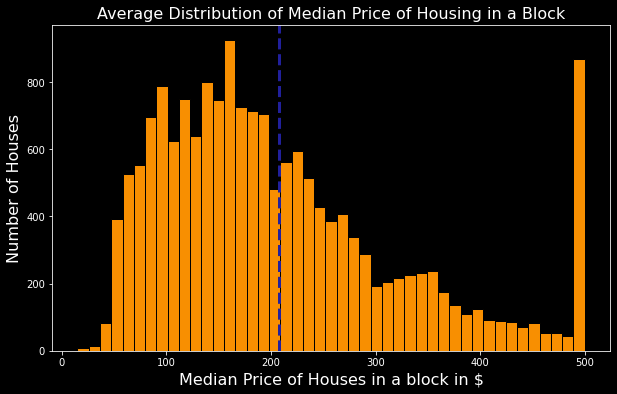

In [57]:
# the above plot for median house values with more information 
plt.figure(figsize=(10, 6))
plt.hist(training_df.median_house_value, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(training_df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()
plt.style.use('dark_background')

In [58]:
# for data visualisation for all columns - https://www.kaggle.com/arhitbosetagore/california-house-price-eda-and-linear-regression
# Note - The link stated above uses a dif source for the same dataset. Hence it has different count and also extra columns. 


In [59]:
# We are not going to do any feature engineering for our columns.


In [60]:
X = training_df.drop('median_house_value', axis= 'columns')
y = training_df['median_house_value']

In [61]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9


In [62]:
y.head()

0   66.9
1   80.1
2   85.7
3   73.4
4   65.5
Name: median_house_value, dtype: float64

In [63]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11900, 8), (5100, 8), (11900,), (5100,))

In [65]:
linreg = LinearRegression().fit(x_train, y_train)


In [66]:
linreg.score(x_test, y_test)



0.6502334761951283

In [67]:
# Our simple model trained with linear regression has an r2 score of 0.6502334761951283


# The coefficient  is defined as where  is the residual sum of squares ((y_true - y_pred) ** 2).sum()
# and  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0. 

# Refer https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [68]:
y_pred = linreg.predict(x_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

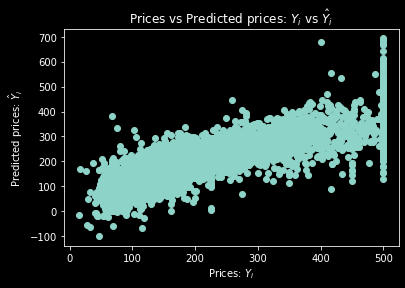

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [70]:
scores = cross_val_score(linreg, X, y, cv=5)

In [71]:
scores

array([0.52201778, 0.56428342, 0.60260364, 0.39679821, 0.65576199])

In [72]:
scores.mean()

0.548293009769323

In [73]:
# we can observe that the scores are very poor/ average. Let us try shuffling the data and see if there is any change at all. 

In [74]:
cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

In [75]:
# refer https://scikit-learn.org/stable/modules/cross_validation.html for cross validation metrics

scores = cross_val_score(linreg, X, y, cv=cv)

In [76]:
scores

array([0.63883632, 0.62859112, 0.61846404, 0.64866406, 0.65352535])

In [77]:
scores.mean()

0.63761617933111

In [78]:
# We can see there is good improvement in the scores. Always remember to shuffle your data. 

In [79]:
# The features were not scaled. We are going to standardise and then check how the model behaves. We will be using StandardScaler from Scikit learn.
# Targets (y) have already been standardised. 
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler().fit(x_train)

In [81]:
x_train_transformed = scaler.transform(x_train)

In [82]:
x_train_transformed[:5]

array([[ 0.2685486 , -0.14577142, -1.32738291,  0.03511423,  0.02052883,
        -0.12107781,  0.05507605, -0.68313657],
       [-1.54142671,  1.59026553, -0.13630352, -0.54328073, -0.49580307,
        -0.71239866, -0.63580351, -1.41046144],
       [ 0.73724744, -0.79152102,  0.34012823, -0.30284989, -0.31978083,
        -0.04927456, -0.27489628, -0.00584957],
       [ 0.63253812, -0.73536888, -0.69214057, -0.39085665,  0.83492505,
         0.26328075,  0.82844868, -0.86495473],
       [ 0.59264886, -0.73068954, -1.00976174,  0.98458924,  1.9732022 ,
         0.38830287,  1.82352147, -0.25744913]])

In [83]:
x_test_transformed = scaler.transform(x_test)

In [84]:
linreg = LinearRegression().fit(x_train_transformed, y_train)

In [85]:
linreg.score(x_test_transformed, y_test)

0.6502334761951255

In [86]:
cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

In [87]:
scores = cross_val_score(linreg, X, y, cv=cv)

In [88]:
scores.mean()

0.63761617933111

In [89]:
# The mean score of the cross valiation is pretty much the same, as the score of the model with and without standardisation is alomst the same. 
# 0.6502334761951283 and 0.6502334761951255
# Only a very minute difference at the 15th and 16th decimal place.


In [90]:
# Let us discuss multi collinearity and also Lasso and Ridge regression.
# References 

# https://www.youtube.com/watch?v=BiofI7OmT80&list=PLkeWm-GW2jpJu89_rkTK4aOpNWIQBeIRW ( 1:36:34)
# https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [91]:
# In case of regularisation, it is advisable to standardise the variables before applying ridge or Lasso regression. 
# When to standardize and different types of standardization - Refer this https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html


In [130]:
# Ridge regression also known as L2 regularisation - Min(||Y – X(theta)||^2 + λ||theta||^2), λ given here is denoted by an alpha parameter in the ridge function.
# So by changing the values of alpha, we are basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced.

# references
# https://www.mygreatlearning.com/blog/what-is-ridge-regression/

In [ ]:
# It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
# It reduces the model complexity by coefficient shrinkage.
# It uses L2 regularization technique. (which I will discussed later in this article)

In [223]:
from sklearn.linear_model import Ridge
# tried for different alphas ( 0.05, 0.10, 0.15 ), Since the score is higher for alpha=0.001, have used the same.

ridgeReg = Ridge(alpha=0.001, normalize=True).fit(x_train_transformed,y_train)

In [224]:
ridgeReg.score(x_test_transformed, y_test)

0.6500216661653614

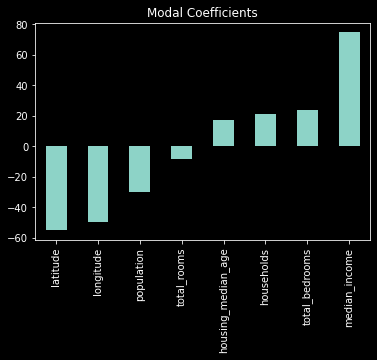

In [133]:
predictors = x_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [133]:
# Lasso regularisation / L1 regularisation - Min(||Y – X(theta)||^2 + λ||theta||), λ given here is denoted by an alpha parameter in the Lasso function.

# references
# https://www.youtube.com/watch?v=BiofI7OmT80&list=PLkeWm-GW2jpJu89_rkTK4aOpNWIQBeIRW
# https://github.com/enceladosaurus/mlmas/blob/master/notebooks/Day1_LinearRegression.ipynb
# https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning
# https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

In [ ]:
# The L1 regularization performed by Lasso, causes the regression coefficient of the less contributing variable to shrink to zero or near zero.
# The less contributing variable is therefore allowed to have a zero or near-zero coefficient


In [187]:
from sklearn.linear_model import Ridge
# tried for different alphas ( 0.3, 0.2, 0.1, 0.05  ), Since the score is higher for alpha=0.05, have used the same.

lassoReg = Lasso(alpha=0.01, normalize=True).fit(x_train_transformed,y_train)


In [188]:
lassoReg.score(x_test_transformed, y_test)

0.6395784220226692

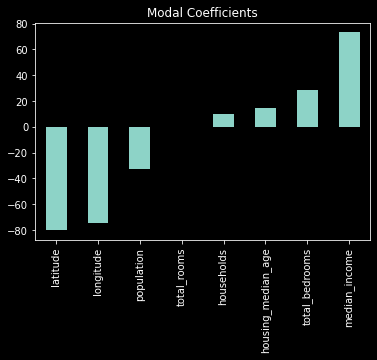

In [189]:
predictors = x_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [191]:
# You can see the coefficients for total_rooms is zero for alpha = 0.01,
#  Lasso selects the only some feature while reduces the coefficients of others to zero.
# This property is known as feature selection and which is absent in case of ridge.

In [190]:
# When to use lasso / ridge ?
# When you have data with multi collinarity ( where some variables have linear relationship with other variables), use Ridge.
# When you have sparse vectors ( more 0s and 1s), Lasso works better. 
# When you do not have any info on the input features, usng Lasso is better. 


In [192]:
# How to find multi collinarity?


In [194]:
x_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0


In [ ]:
# in the above data, 
# households and population have 0.9, which means they are highly correlated.  ( threshold of 0.7)
# total_rooms and total_bedrooms have 0.9 which are highly correlated. 
# In this case, it is better to apply Ridge regression. We can see that ridge with alpha of 0.001 gives a score of 0.6500216661653614